In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.api.types import CategoricalDtype

In [2]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## EDA TASKS

## Kiểm tra tính chất các cột và số lượng hàng, kiểu dữ liệu của df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
df.describe(include='all')

,Member_number,Date,itemDescription
count,38765.000000,38765,38765
unique,NaN,728,167
top,NaN,21-01-2015,whole milk
freq,NaN,96,2502
mean,3003.641868,NaN,NaN
std,1153.611031,NaN,NaN
min,1000.000000,NaN,NaN
25%,2002.000000,NaN,NaN
50%,3005.000000,NaN,NaN
75%,4007.000000,NaN,NaN


Chuẩn hóa cột Date và Member_number về đúng định dạng

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df['Member_number'] = df['Member_number'].astype('object')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  object        
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


Kiểm tra khoảng thời gian của dataframe với các giao dịch con

In [11]:
#Bộ data nằm trong khoảng thời gian từ ngày 01-01-2014 đến 30-12-2015
str(df['Date'].dt.date.min()) + '  to  ' +str(df['Date'].dt.date.max()) 

'2014-01-01  to  2015-12-30'

In [12]:
df.duplicated(keep='first').sum()

759

In [ ]:
df[df.duplicated(keep=False)].sort_values(by='Member_number') # kiểm tra sự trùng lặp về các hàng

,Member_number,Date,itemDescription
33098,1003,2014-02-27,rolls/buns
37649,1003,2014-02-27,rolls/buns
31248,1005,2014-01-09,rolls/buns
15099,1005,2014-01-09,rolls/buns
7532,1006,2015-06-14,frankfurter
...,...,...,...
7540,4981,2015-01-10,margarine
8109,4988,2015-10-29,rolls/buns
24258,4988,2015-10-29,rolls/buns
38136,4992,2014-02-24,margarine


In [12]:
df[df.duplicated(keep=False)].groupby(['Member_number','Date','itemDescription'],as_index=False).agg(DuplicateCount=('itemDescription','count')).sort_values(by='Member_number') 

,Member_number,Date,itemDescription,DuplicateCount
0,1003,2014-02-27,rolls/buns,2
1,1005,2014-09-01,rolls/buns,2
2,1006,2015-06-14,frankfurter,2
3,1008,2015-07-21,yogurt,2
4,1026,2015-05-28,root vegetables,2
...,...,...,...,...
727,4960,2015-08-19,bottled water,2
728,4968,2014-04-03,beef,2
729,4981,2015-10-01,margarine,3
730,4988,2015-10-29,rolls/buns,2


Từ cột date phân tích sang thứ - ngày - tháng - năm

In [ ]:
df['Weekdays'],df['Days'],df['Months'],df['Years']= df.Date.dt.strftime('%A'),df.Date.dt.strftime('%d'),\
                                                    df.Date.dt.strftime('%b'),df.Date.dt.strftime('%Y')
df.head()

,Member_number,Date,itemDescription,Weekdays,Days,Months,Years
0,1808,2015-07-21,tropical fruit,Tuesday,21,Jul,2015
1,2552,2015-01-05,whole milk,Monday,05,Jan,2015
2,2300,2015-09-19,pip fruit,Saturday,19,Sep,2015
3,1187,2015-12-12,other vegetables,Saturday,12,Dec,2015
4,3037,2015-02-01,whole milk,Sunday,01,Feb,2015


In [15]:
df['itemDescription'].nunique() # số sản phẩm

167

In [16]:
df['Member_number'].nunique() # số người dùng

3898

Tìm top 10 mặt hàng được mua nhiều nhất

In [17]:
Top10Groceries=df.itemDescription.value_counts().sort_values(ascending=False)[0:10]

fig=px.bar(Top10Groceries,color=Top10Groceries.index,
           labels={'value':'Quantity Sold','index':'Grocery Items'})
fig.update_layout(showlegend=False,
                 title_text='Top 10 Groceries Sold',title_x=0.5,
                 title={'font': {'size':20}} )
fig.show()

Tìm top 10 khách hàng mua hàng nhiều nhất

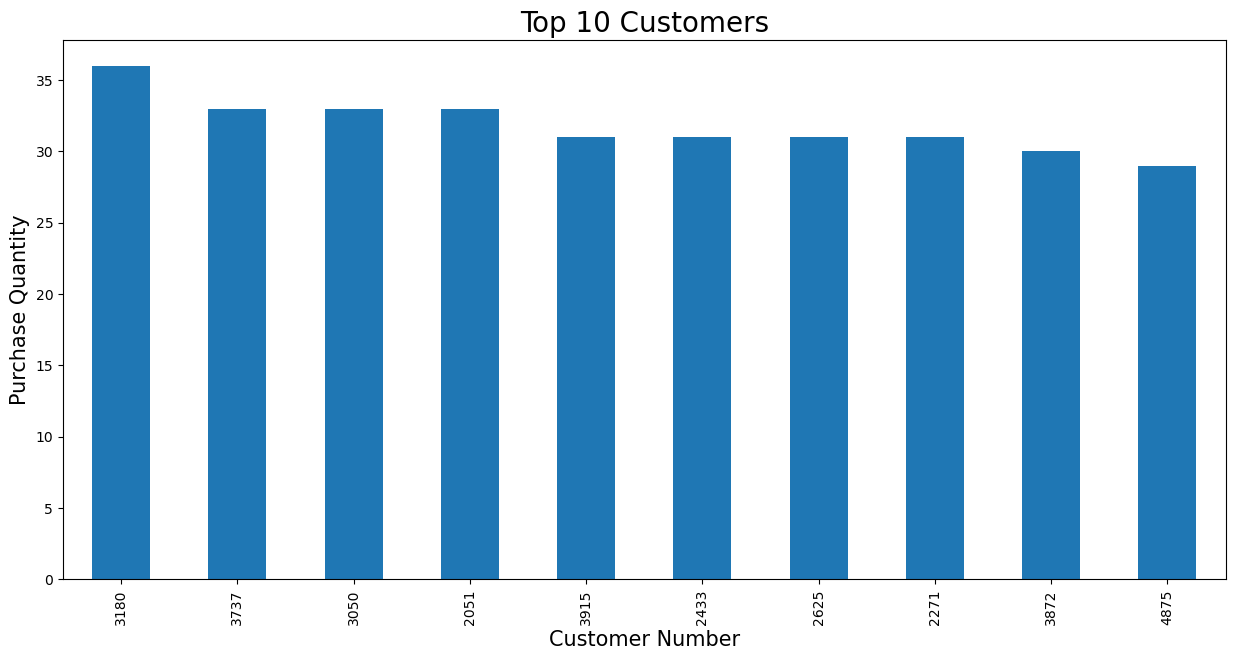

In [18]:
Top10Customers=df.groupby('Member_number').agg(PurchaseQuantity=('itemDescription','count')).sort_values(by='PurchaseQuantity',ascending=False)[0:10]

Top10Customers.plot(kind='bar',figsize=(15,7),legend=None)
plt.title('Top 10 Customers',fontsize=20)
plt.xlabel('Customer Number',fontsize=15)
plt.ylabel('Purchase Quantity',fontsize=15)
plt.show()

In [19]:
df.set_index('Date',inplace=True)

Thống kê số lượng sản phẩm mua theo ngày từ 2014 tới 2015

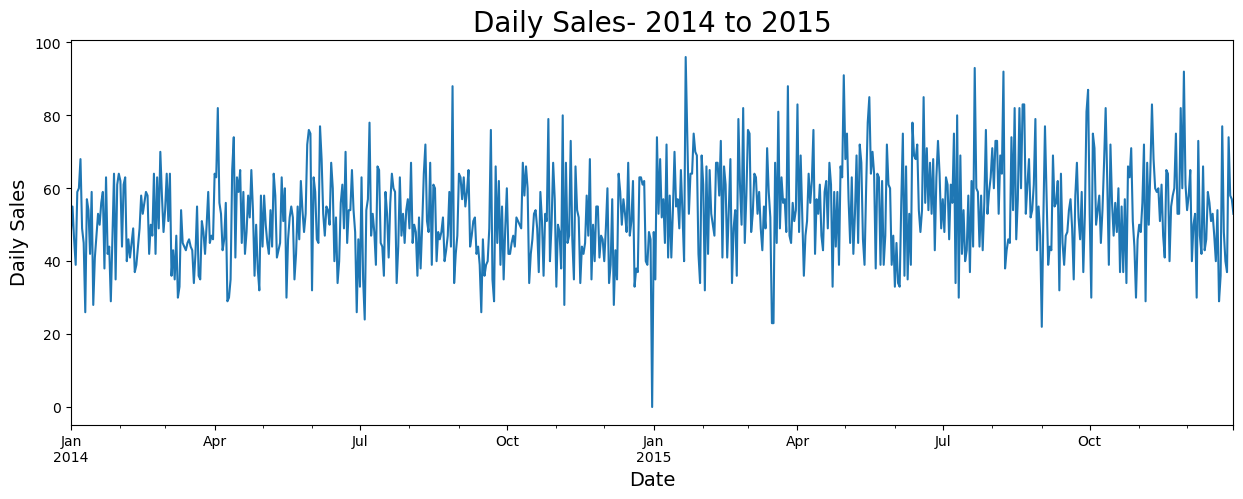

In [20]:
df.resample('D')[['itemDescription']].count().plot(kind='line',figsize=(15,5),legend=None)
plt.title('Daily Sales- 2014 to 2015',fontsize=20)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Daily Sales',fontsize=14)
plt.show()

Thống kê số lượng hàng được bán ra theo tháng

C:\Users\hieup\AppData\Local\Temp\ipykernel_2620\1112762192.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



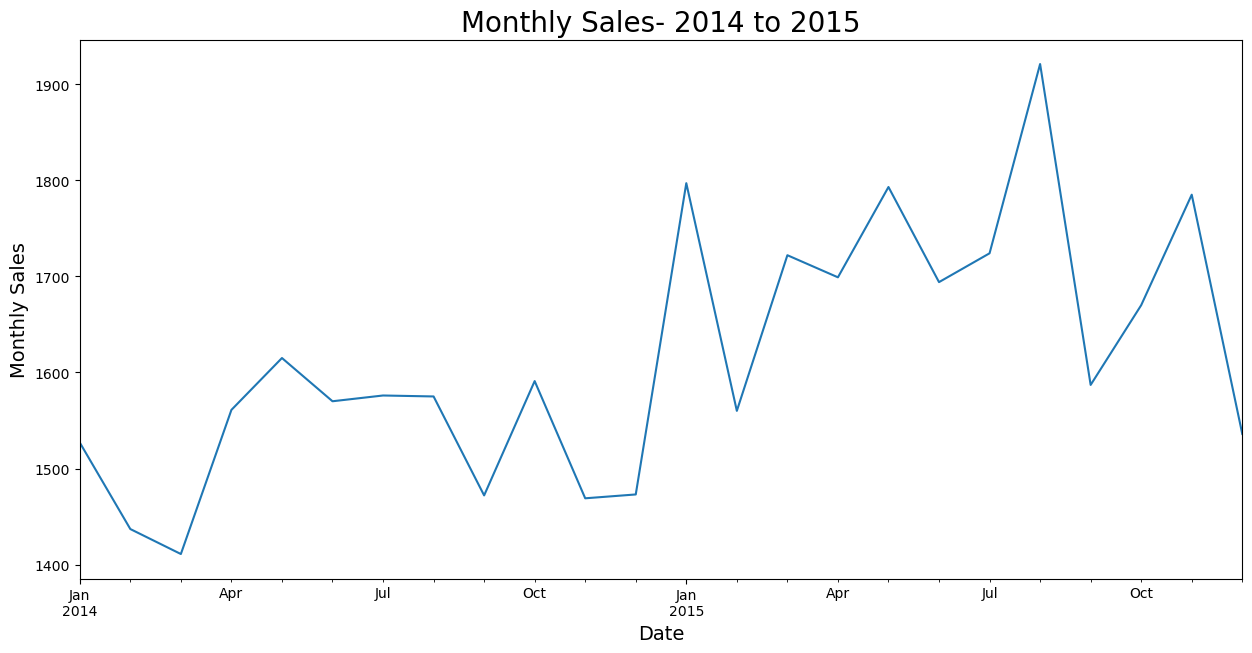

In [21]:
df.resample('M')[['itemDescription']].count().plot(kind='line',figsize=(15,7),legend=None )
plt.title('Monthly Sales- 2014 to 2015',fontsize=20)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Monthly Sales',fontsize=14)
plt.show()

In [22]:
temp=df.groupby(['Years','Months'],as_index=False).agg(Sales=('itemDescription','count'))
temp.head()

,Years,Months,Sales
0,2014,Apr,1561
1,2014,Aug,1575
2,2014,Dec,1473
3,2014,Feb,1437
4,2014,Jan,1527


So sánh số lượng mua hàng theo tháng giữa 2014 và 2015
Chúng ta thấy rằng năm 2015 doanh số bán ra được nhiều hơn 2014

In [23]:
order_months=CategoricalDtype(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
temp['Months']=temp['Months'].astype(order_months)
temp=temp.sort_values(by='Months')
fig=px.line(temp,x='Months',y='Sales',color='Years')
fig.update_layout(title_text='Monthly Sales- 2014 to 2015',title_x=0.5,
                 title={'font': {'size':20}})

Số lượng bán hàng theo ngày trong tuần giữa 2014 và 2015
Vẫn là 2015 bán được nhiều hơn

In [24]:
temp2=df.groupby(['Years','Weekdays'],as_index=False).agg(Sales=('itemDescription','count'))

order_days=CategoricalDtype(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
temp2['Weekdays']=temp2['Weekdays'].astype(order_days)
temp2=temp2.sort_values(by='Weekdays')

fig=px.line(temp2,x='Weekdays',y='Sales',color='Years')
fig.update_layout(title_text='Weekday Sales- 2014 to 2015',title_x=0.5,
                 title={'font': {'size':20}})

Chúng ta thống kê số lượng hàng bán ra trong 1 tháng, có thể thấy 20015 vẫn bán được nhiều hơn 2014

In [25]:
temp3=df.groupby(['Years','Days'],as_index=False).agg(Sales=('itemDescription','count'))

fig=px.line(temp3,x='Days',y='Sales',color='Years')
fig.update_layout(title_text='Sales Per Days of the Month',title_x=0.5,
                 title={'font':{'size':20}})
fig.show()

Tuy nhiên xét về số lượng khách hàng, chúng ta thấy lượng khách hàng năm 2015 giảm đi nhiều so với 2014

In [ ]:
# theo ngày trong tuần
temp4= df.groupby(['Years','Weekdays'],as_index=False).agg(DailyCustomers=('Member_number','nunique'))

order_days=CategoricalDtype(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
temp4['Weekdays']=temp4['Weekdays'].astype(order_days)
temp4=temp4.sort_values(by='Weekdays')

fig=px.line(temp4,x='Weekdays',y='DailyCustomers',color='Years')
fig.update_layout(title_text='Weekday Customers- 2014 & 2015',title_x=0.5,
                 title={'font': {'size':20}})

In [27]:
df=df.reset_index()

In [28]:
temp5= df.groupby([pd.Grouper(key='Date',freq='D'),'Years','Months','Weekdays'],as_index=False).agg(UniqueCustomers=('Member_number','nunique'))
temp5

,Date,Years,Months,Weekdays,UniqueCustomers
0,2014-01-01,2014,Jan,Wednesday,21
1,2014-01-02,2014,Jan,Thursday,25
2,2014-01-03,2014,Jan,Friday,21
3,2014-01-04,2014,Jan,Saturday,17
4,2014-01-05,2014,Jan,Sunday,24
...,...,...,...,...,...
723,2015-12-26,2015,Dec,Saturday,15
724,2015-12-27,2015,Dec,Sunday,21
725,2015-12-28,2015,Dec,Monday,19
726,2015-12-29,2015,Dec,Tuesday,22


Xem xét những khách hàng(không tính số lần mua) theo ngày trong tuần giữa 2014 và 2015

In [29]:
temp6=temp5.groupby(['Years','Weekdays'],as_index=False)[['UniqueCustomers']].mean()

fig=px.bar(temp6,x='Weekdays',y='UniqueCustomers',color='Weekdays',facet_col='Years',
          category_orders={'Weekdays':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']})
fig.update_layout(title_text='Avg Number of Unique Customers Per Weekday',title_x=0.5,
                 title={'font': {'size':20}},
                 showlegend=False)
fig.show()

In [30]:
temp6=df.groupby([pd.Grouper(key='Date',freq='D'),'Years','Weekdays'],as_index=False).agg(Sales=('itemDescription','count'),Customers=('Member_number','nunique'))
temp6

,Date,Years,Weekdays,Sales,Customers
0,2014-01-01,2014,Wednesday,48,21
1,2014-01-02,2014,Thursday,55,25
2,2014-01-03,2014,Friday,46,21
3,2014-01-04,2014,Saturday,39,17
4,2014-01-05,2014,Sunday,59,24
...,...,...,...,...,...
723,2015-12-26,2015,Saturday,37,15
724,2015-12-27,2015,Sunday,74,21
725,2015-12-28,2015,Monday,58,19
726,2015-12-29,2015,Tuesday,57,22


Thống kê xem một khách hàng mua bao nhiêu sản phẩm theo ngày trong tuần giữa 2014 và 2015

In [31]:
temp7=temp6.groupby(['Years','Weekdays'],as_index=False).agg(Sales=('Sales','sum'),Customers=('Customers','sum')).eval('SalesPerCustomer=Sales/Customers').drop(columns=['Sales','Customers'])

fig=px.bar(temp7,x='Weekdays',y='SalesPerCustomer',color='Weekdays',facet_col='Years',
      category_orders={'Weekdays':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']})

fig.update_layout(title_text='Weekday Sales Per Customer',title_x=0.5,
                 title={'font': {'size':20}},
                 showlegend=False)


fig.show()

## Find baskets

In [32]:
df.head()

,Date,Member_number,itemDescription,Weekdays,Days,Months,Years
0,2015-07-21,1808,tropical fruit,Tuesday,21,Jul,2015
1,2015-01-05,2552,whole milk,Monday,05,Jan,2015
2,2015-09-19,2300,pip fruit,Saturday,19,Sep,2015
3,2015-12-12,1187,other vegetables,Saturday,12,Dec,2015
4,2015-02-01,3037,whole milk,Sunday,01,Feb,2015


In [32]:
%pip install google-search-results


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from serpapi import GoogleSearch
unique_items = df['itemDescription'].unique()
def fetch_image_links(product_name, api_key):
    params = {
        "engine": "google",
        "q": product_name,
        "tbm": "isch",
        "num": 1,
        "api_key": api_key,
    }
    search = GoogleSearch(params)
    results = search.get_dict()
    if "images_results" in results:
        return results["images_results"][0]["original"]
    return None

api_key = "61d4b2de050dc7e2e3e7e2aa2a42901f112d2baa3a712903c79cf3b21e6ad87c"
product_images = []
for item in unique_items:
    image_link = fetch_image_links(item, api_key)
    product_images.append({"Product": item, "Image Link": image_link})

pd.DataFrame(product_images).to_csv('product_images_2.csv', index=False)
print("Product images saved to 'product_images.csv'")


Chỉ lấy 3 cột ra để phân tích tìm giỏ hàng

In [33]:
df_process = df[['Date', 'Member_number', 'itemDescription']]
df_process.head()

,Date,Member_number,itemDescription
0,2015-07-21,1808,tropical fruit
1,2015-01-05,2552,whole milk
2,2015-09-19,2300,pip fruit
3,2015-12-12,1187,other vegetables
4,2015-02-01,3037,whole milk


In [ ]:
# nhóm các sản phẩm theo Date và Member_number để tìm các giỏ hàng
baskets = (
    df_process.groupby(['Date', 'Member_number'])['itemDescription']
    .agg(lambda x: ','.join(sorted(x)))
    .reset_index()
)
baskets.head()

,Date,Member_number,itemDescription
0,2014-01-01,1249,"citrus fruit,coffee"
1,2014-01-01,1381,"curd,soda"
2,2014-01-01,1440,"other vegetables,yogurt"
3,2014-01-01,1659,"frozen vegetables,specialty chocolate"
4,2014-01-01,1789,"candles,hamburger meat"


Lưu df này xuống file baskets.csv để phục vụ tìm frequent patterns và association rules

In [35]:
baskets['Date'] = pd.to_datetime(baskets['Date']).dt.strftime('%d/%m/%Y')

# Đổi tên cột
baskets.columns = ['Member_number', 'Date', 'Baskets']

baskets.to_csv('baskets.csv', sep=';', index=False)

In [41]:
unique_items

array(['citrus fruit', 'coffee', 'curd', 'soda', 'other vegetables',
       'yogurt', 'specialty chocolate', 'frozen vegetables',
       'hamburger meat', 'candles', 'tropical fruit', 'sausage',
       'bottled water', 'Instant food products', 'cleaner',
       'shopping bags', 'sliced cheese', 'bottled beer', 'domestic eggs',
       'frozen potato products', 'whole milk', 'flower (seeds)',
       'berries', 'whipped/sour cream', 'onions', 'dishes', 'waffles',
       'chocolate', 'brown bread', 'butter', 'root vegetables', 'chicken',
       'specialty bar', 'frankfurter', 'sparkling wine',
       'fruit/vegetable juice', 'napkins', 'beef', 'pastry',
       'canned beer', 'white bread', 'pickled vegetables', 'meat',
       'ice cream', 'candy', 'soft cheese', 'frozen dessert',
       'misc. beverages', 'butter milk', 'oil', 'frozen meals',
       'pip fruit', 'frozen fish', 'condensed milk', 'dessert', 'sugar',
       'cream cheese ', 'rolls/buns', 'hard cheese', 'liqueur',
       'pres

# Add price for products

In [3]:
product = pd.read_csv('product_images.csv')
product['Price'] = [random.randint(20, 250) for _ in range(len(product))]
product.head()

,Product,Image Link,Price
0,citrus fruit,https://cdn.shopify.com/s/files/1/0484/4404/75...,212
1,coffee,https://upload.wikimedia.org/wikipedia/commons...,207
2,curd,https://www.indianhealthyrecipes.com/wp-conten...,79
3,soda,https://i5.walmartimages.com/seo/Pack-22-Soda-...,128
4,other vegetables,https://www.onlyfoods.net/wp-content/uploads/2...,214


In [4]:
product.to_csv('products.csv', sep=',', index=False)